# Q1. Read and write the dimensions of an image (any image).


In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import numpy as np
import cv2 as cv 


#URL for image
url = "https://helpx.adobe.com/content/dam/help/en/stock/how-to/visual-reverse-image-search/jcr_content/main-pars/image/visual-reverse-image-search-v2_intro.jpg"

imgurl = io.imread(url)  

convt_img = cv.cvtColor(imgurl, cv.COLOR_BGR2RGB) 

cv2_imshow(convt_img)

print("\n RGB image\n")
pixelcomp = imgurl.shape
print("Image dimensions:",pixelcomp)


# Q2-Perform following operations on an image:
# (a)-Grayscale conversion.

In [ ]:
gray_image = cv.cvtColor(imgurl, cv.COLOR_BGR2GRAY)
print("\nGray image\n")
cv2_imshow(gray_image)


# (b)-Find the index of pixels having value equal to 6 in both images.

In [ ]:
gray_image = cv.cvtColor(imgurl, cv.COLOR_BGR2GRAY)

row = gray_image.shape[0]
col = gray_image.shape[1]

for i in range(row) :
 for j in range(col) :
   pixel_val = gray_image[i,j]   
   if(pixel_val == 6 ) :
     print("Index x: {} y: {}".format(i,j))

# (c)-Identify and display the value of darkest pixel in both the images. 

In [ ]:
print("Darkest pixel in Original Image")

row = imgurl.shape[0]
col = imgurl.shape[1]

for i in range(row) :
 for j in range(col) :
   pixel_val = imgurl[i,j]
   if(pixel_val[0] == 6 and pixel_val[1] == 6 and pixel_val[2] == 6) :
     print("Index x: {} y: {}".format(i,j))


print("\nDarkest pixel in Gray Image")
gray_image = cv.cvtColor(imgurl, cv.COLOR_BGR2GRAY)

row = gray_image.shape[0]
col = gray_image.shape[1]

for i in range(row) :
 for j in range(col) :
   pixel_val = gray_image[i,j]   
   if(pixel_val == 255 ) :
     print("Index x: {} y: {}".format(i,j))

# (d)-Modify the above image by replacing the square (31x31) around darkest pixel with the white pixels.

In [ ]:
new_img = gray_image.copy()

x = 148 
y = 592
for i in range (x -15 ,x+15+2):
  for j in range (y-15, y+15+2):
      new_img[i,j] = 255

cv2_imshow(new_img)

# (e)-In the above image (2 d), make a gray square with pixel value 100 at the center of this image




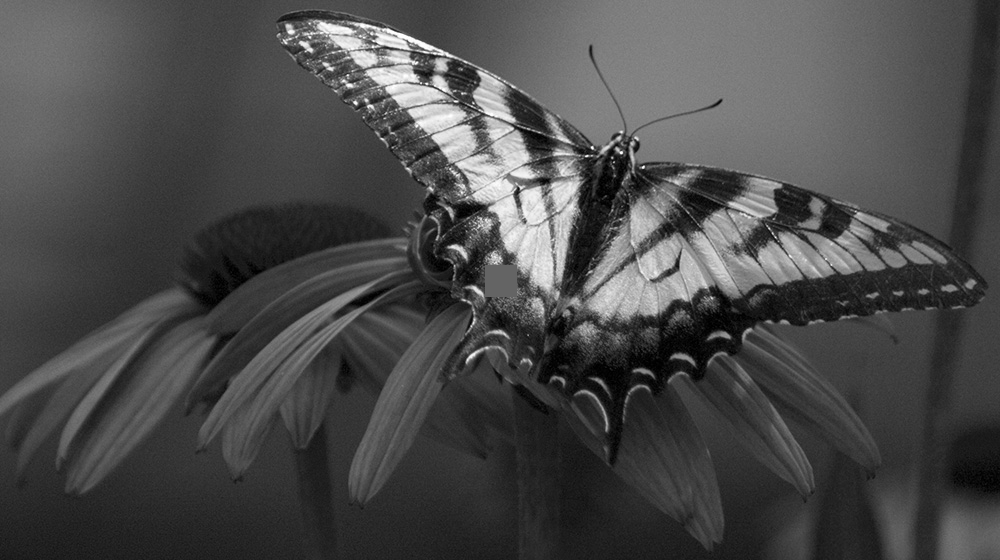

In [27]:
cntre_x =  row//2
cntre_y =  col//2

gray_square = gray_image.copy()

for i in range (cntre_x -15 ,cntre_x + 15 + 2):

  for j in range (cntre_y-15, cntre_y + 15+2):

    gray_square[i,j] = 100

cv2_imshow(gray_square)

# Q3. Compute the average pixel value for each channel R, G, and B then subtract the average value per channel for the above image ( used in q1).

In [ ]:
avg_0 = np.average(convt_img[:, :, 0])

avg_1 = np.average(convt_img[:, :, 1])

avg_2 = np.average(convt_img[:, :, 2])

print("\n")
for i in range (0,pixelcomp[0]):
  for j in range (0,pixelcomp[1]):
        convt_img[i,j,0]-=avg_0
        convt_img[i,j,1]-=avg_1
        convt_img[i,j,2]-=avg_2

print("After the Operation:\n")
cv2_imshow(convt_img)
print("avg Red",avg_0)
print("avg Green",avg_1)
print("avg Blue",avg_2)

# Q4-Perform basic transformation on an image: Apply padding in case of loss of data.
# (a)-Rotation 30 degree

In [ ]:
import imutils
help_img = imgurl.copy()

rotated = imutils.rotate_bound(help_img, 30)

cv2_imshow(rotated)

# (b)-Scaling by factor 2

In [ ]:
scale_img = cv.resize(imgurl, None, fx=2, fy=2)
print("\n\n Image After Scaling by 2 \n")
cv2_imshow(scale_img)

# (c)-Shifting (0,0) to (10, 10)

In [ ]:
#Translation Matrix
M = np.float32([[1, 0, 10], [0, 1, 10]]) 


res = cv.warpAffine(imgurl, M , (col, row)) 
  
print("\n Image After Shifting:\n")
cv2_imshow(res)

# (d)-Filtering to detect edges.

In [ ]:
edge_img = cv.Canny(imgurl,40,40)
print("\n\nImage with only Edges looks like as below:-\n")
cv2_imshow(edge_img)